# Exploration des données - CIFAR-100

Cette partie est pour explorer le jeu de données CIFAR-100. L'objectif est de comprendre la structure des données, visualiser leur contenu, analyser leur distribution et identifier les besoins en prétraitement.

## Objectifs
1. Charger les données CIFAR-100.
2. Explorer les caractéristiques des images et des labels.
3. Analyser les statistiques des données (distribution des classes, valeurs des pixels).
4. Identifier les potentiels problèmes (déséquilibres, anomalies).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle

## Chargement des données

Le jeu de données CIFAR-100 est chargé à l'aide de la bibliothèque `tensorflow.keras`.
Il contient :
- 50 000 images d'entraînement.
- 10 000 images de test.
- 100 classes réparties de manière équilibrée.
- Chaque image est de taille 32x32 avec 3 canaux de couleur (RVB).


In [ ]:
# Chargement des données
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Aperçu des dimensions des données
print(f"Dimensions des images d'entraînement : {x_train.shape}")
print(f"Dimensions des labels d'entraînement : {y_train.shape}")
print(f"Dimensions des images de test : {x_test.shape}")
print(f"Dimensions des labels de test : {y_test.shape}")

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Dimensions des images d'entraînement : (50000, 32, 32, 3)
Dimensions des labels d'entraînement : (50000, 1)
Dimensions des images de test : (10000, 32, 32, 3)
Dimensions des labels de test : (10000, 1)


## Visualisation des données

Affichons quelques exemples d'images avec leurs labels pour comprendre leur structure visuelle et vérifier leur qualité.

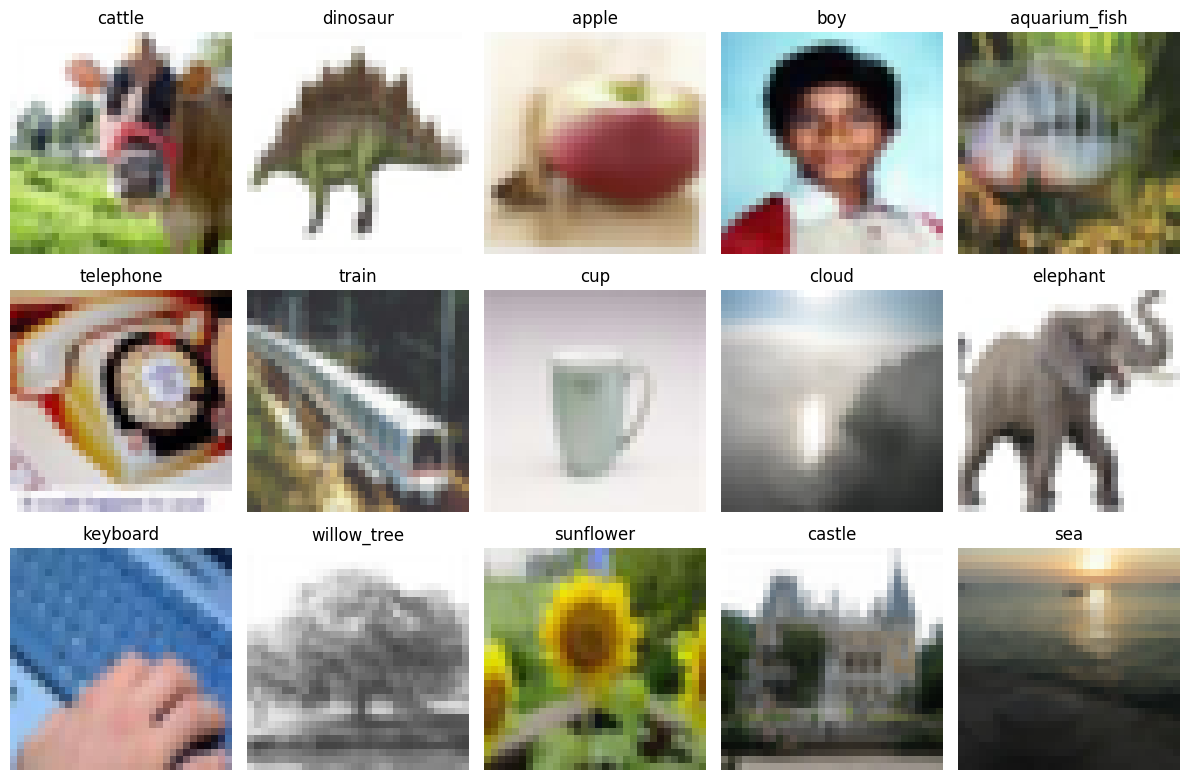

In [ ]:
# Liste des classes dans CIFAR-100 (labels "fine")
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# Visualisation d'échantillons
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.set_title(f"{class_names[y_train[i][0]]}")
    ax.axis("off")
plt.tight_layout()
plt.show()

## Analyse des statistiques des données

- Distribution des labels : Comptons le nombre d'images par classe.
- Distribution des pixels : Vérifions la plage et la distribution des valeurs des pixels.
- Classes sous-représentées : Identifions si certaines classes sont déséquilibrées.

#### **Analyse des labels**

Distribution des labels dans l'ensemble d'entraînement :
19    500
69    500
88    500
32    500
34    500
Name: count, dtype: int64


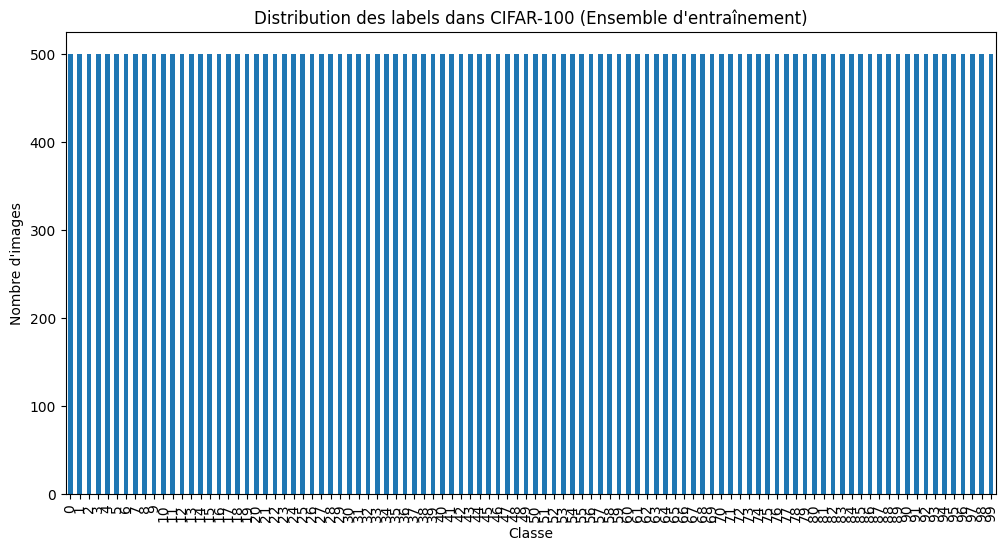

In [ ]:
# Distribution des labels
label_counts = pd.Series(y_train.flatten()).value_counts()

# Affichage des premières classes
print("Distribution des labels dans l'ensemble d'entraînement :")
print(label_counts.head())

# Visualisation de la distribution
plt.figure(figsize=(12, 6))
label_counts.sort_index().plot(kind="bar")
plt.title("Distribution des labels dans CIFAR-100 (Ensemble d'entraînement)")
plt.xlabel("Classe")
plt.ylabel("Nombre d'images")
plt.show()

#### **Analyse des pixels**

In [ ]:
# Statistiques sur les pixels
mean_pixel_value = x_train.mean()
std_pixel_value = x_train.std()
min_pixel_value = x_train.min()
max_pixel_value = x_train.max()

print(f"Valeur moyenne des pixels : {mean_pixel_value:.2f}")
print(f"Écart-type des pixels : {std_pixel_value:.2f}")
print(f"Valeur minimale : {min_pixel_value}")
print(f"Valeur maximale : {max_pixel_value}")

Valeur moyenne des pixels : 121.94
Écart-type des pixels : 68.39
Valeur minimale : 0
Valeur maximale : 255


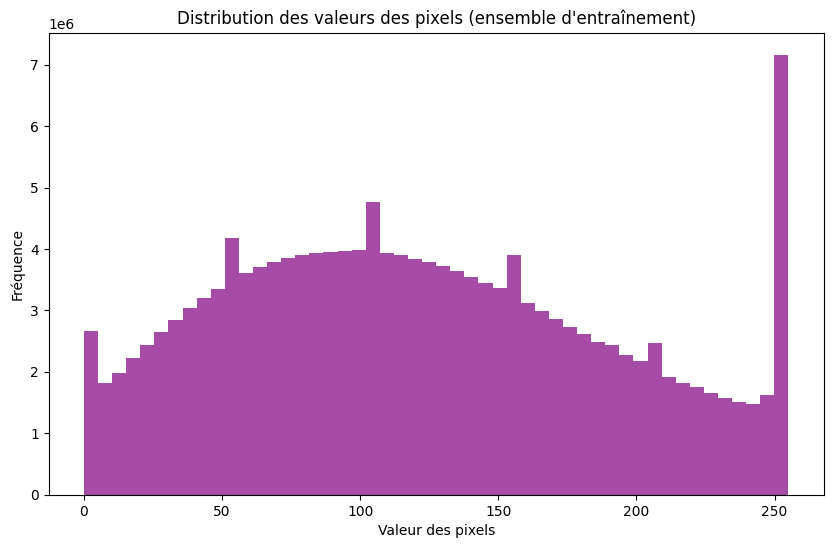

In [ ]:
# Histogramme des pixels
plt.figure(figsize=(10, 6))
plt.hist(x_train.flatten(), bins=50, color="purple", alpha=0.7)
plt.title("Distribution des valeurs des pixels (ensemble d'entraînement)")
plt.xlabel("Valeur des pixels")
plt.ylabel("Fréquence")
plt.show()

Moyenne par canal (R, G, B) : [129.30416561 124.0699627  112.43405006]
Écart-type par canal (R, G, B) : [68.1702429  65.39180804 70.41837019]


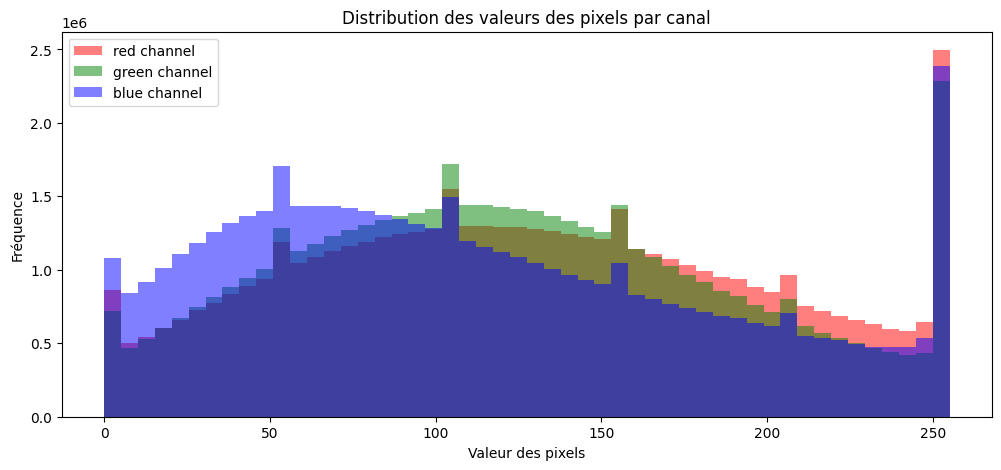

In [ ]:
# Analyse canal par canal
mean_per_channel = x_train.mean(axis=(0, 1, 2))
std_per_channel = x_train.std(axis=(0, 1, 2))

print(f"Moyenne par canal (R, G, B) : {mean_per_channel}")
print(f"Écart-type par canal (R, G, B) : {std_per_channel}")

# Visualisation de la distribution par canal
plt.figure(figsize=(12, 5))
for i, color in enumerate(["red", "green", "blue"]):
    plt.hist(x_train[:, :, :, i].flatten(), bins=50, alpha=0.5, label=f"{color} channel", color=color)
plt.title("Distribution des valeurs des pixels par canal")
plt.xlabel("Valeur des pixels")
plt.ylabel("Fréquence")
plt.legend()
plt.show()


#### **Détection des classes problématiques**
Identifions les classes sous-représentées ou problématiques pour orienter les étapes de prétraitement.

In [ ]:
import numpy as np
import pandas as pd

# Vérification de l'équilibre des classes
train_counts = pd.Series(np.squeeze(y_train)).value_counts()
test_counts = pd.Series(np.squeeze(y_test)).value_counts()

print("Répartition des classes dans les données d'entraînement :")
print(train_counts)

print("\nRépartition des classes dans les données de test :")
print(test_counts)


Répartition des classes dans les données d'entraînement :
19    500
69    500
88    500
32    500
34    500
     ... 
81    500
22    500
21    500
65    500
16    500
Name: count, Length: 100, dtype: int64

Répartition des classes dans les données de test :
49    100
83    100
60    100
74    100
1     100
     ... 
11    100
58    100
73    100
56    100
88    100
Name: count, Length: 100, dtype: int64


In [ ]:
# Classes sous-représentées (si moins de 500 images par classe)
underrepresented_classes = label_counts[label_counts < 500]
print("Classes sous-représentées :")
print(underrepresented_classes)

Classes sous-représentées :
Series([], Name: count, dtype: int64)


## Conclusion

- Les données CIFAR-100 sont uniformément réparties, chaque classe ayant exactement 500 images.
- Les pixels sont dans une plage de [0, 255], nécessitant une normalisation pour les modèles sensibles aux valeurs absolues.
- Aucune anomalie ou déséquilibre évident n'a été détecté.
- Étapes suivantes :
  - Normaliser les données pour les modèles nécessitant une échelle [0,1].
  - Implémenter des techniques de data augmentation pour enrichir les données et réduire les risques de surajustement.